<a href="https://colab.research.google.com/github/Koftarik/Flight_satisfaction/blob/main/Airline_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
# случайные десять записей из датасета
df.sample(10)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
56490,56491,Male,69.0,Loyal Customer,Business travel,Business,937.0,16.0,0.0,3.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,satisfied
61895,61896,Female,7.0,Loyal Customer,Personal Travel,Eco Plus,2254.0,29.0,5.0,2.0,...,2.0,1.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,-
55995,55996,Male,22.0,disloyal Customer,Business travel,Eco,2586.0,177.0,225.0,4.0,...,5.0,5.0,3.0,5.0,5.0,4.0,5.0,3.0,5.0,-
10973,10974,Female,42.0,disloyal Customer,Business travel,Eco,224.0,2.0,4.0,2.0,...,1.0,2.0,2.0,1.0,5.0,5.0,4.0,1.0,2.0,-
109237,109238,Male,19.0,Loyal Customer,Personal Travel,Eco,616.0,0.0,0.0,1.0,...,1.0,1.0,1.0,4.0,5.0,3.0,1.0,3.0,1.0,-
20636,20637,Female,28.0,Loyal Customer,Business travel,Business,793.0,57.0,67.0,5.0,...,4.0,4.0,4.0,1.0,5.0,1.0,1.0,3.0,4.0,-
100214,100215,Female,32.0,Loyal Customer,Personal Travel,Eco,762.0,0.0,0.0,5.0,...,5.0,3.0,3.0,3.0,4.0,4.0,1.0,4.0,3.0,satisfied
64082,64083,Female,65.0,Loyal Customer,Personal Travel,Eco,919.0,0.0,0.0,1.0,...,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,neutral or dissatisfied
81159,81160,Male,37.0,Loyal Customer,Personal Travel,Eco,700.0,10.0,0.0,2.0,...,2.0,24.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,neutral or dissatisfied
102247,102248,Female,54.0,Loyal Customer,Business travel,Business,3513.0,19.0,20.0,0.0,...,5.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,satisfied


In [7]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [8]:
df.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


# Разведочный анализ данных

##Числовые данные

Для начала оценим качество числовых данных, в которых могут быть очевидные выбросы. Это Age, Flight Distance, Departure Delay in Minutes и Arrival Delay in Minutes.

Text(0.5, 1.0, 'Задержка прилета')

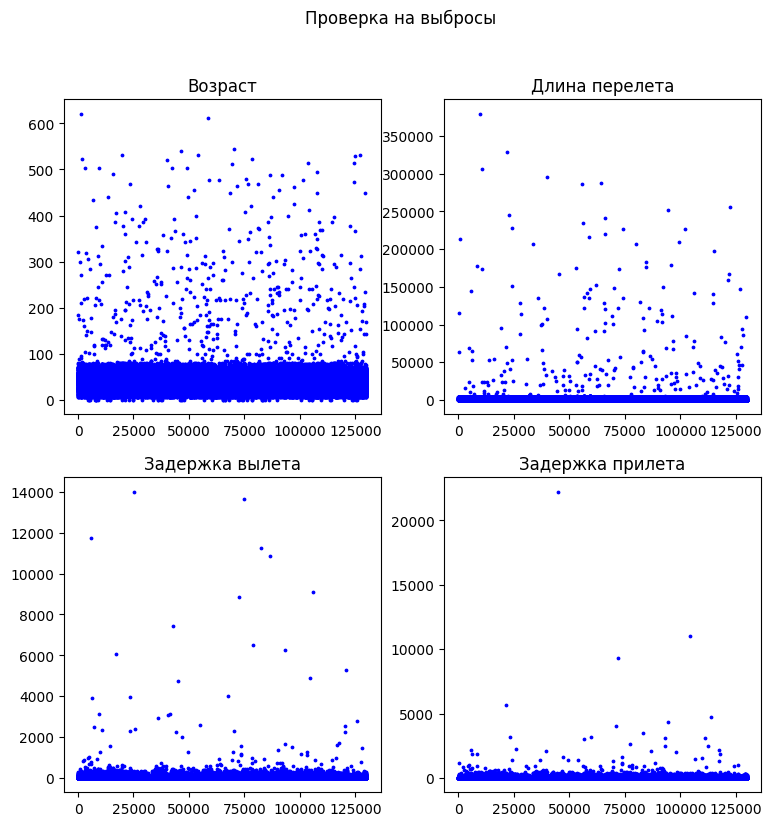

In [9]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize = [9,9],)

fig. suptitle('Проверка на выбросы')

axs[0,0].scatter(df['id'], df['Age'], s=3, color = 'blue')
axs[0,0].set_title('Возраст')

axs[0,1].scatter(df['id'], df['Flight Distance'], s=3, color = 'blue')
axs[0,1].set_title('Длина перелета')

axs[1,0].scatter(df['id'], df['Arrival Delay in Minutes'], s=3, color = 'blue')
axs[1,0].set_title('Задержка вылета')

axs[1,1].scatter(df['id'], df['Departure Delay in Minutes'], s=3, color = 'blue')
axs[1,1].set_title('Задержка прилета')


Очевидно, что возраст в 621 год (год осады Смирны Тамерланом), полет в 370 000 миль (полет до Луны и обратно) и задержка в 23000 минут (16 дней) не являются адекватными значениями.

Ограничим возраст 100 годами и посмотрим на распределение возрастов. Судя по графику, абсолютное большинство пассажиров младше 80 лет, поэтому ограничим выборку этим числом. Также удалим нулевые значения.

In [10]:
df['Age'] = np.where(df['Age'] > 100, np.NaN, df['Age'])

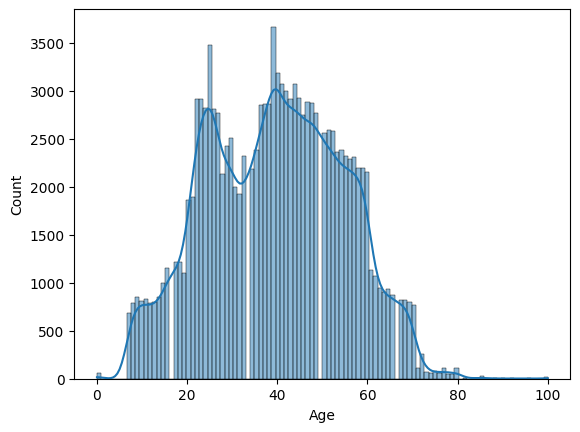

In [11]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [12]:
df['Age'] = np.where(df['Age'] > 80, np.NaN, df['Age'])
df['Age'] = np.where(df['Age'] == 0, np.NaN, df['Age'])

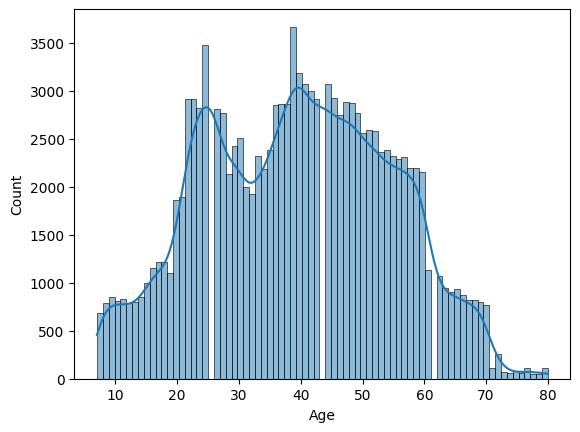

In [13]:
sns.histplot(df['Age'], kde=True)
plt.show()

Самый протяженный коммерческий авиарейс на 2023 год составляет около 10560 миль (Сингапур - Ньюарк), поэтому ограничим дальность полета этим числом. Судя по графику, абсолютное большинство рейсов не превышает 4000 миль, поэтому затем ограничим выборку этим числом, а также удалим нулевые значения.

In [14]:
df['Flight Distance'] = np.where(df['Flight Distance'] > 10560, np.NaN, df['Flight Distance'])

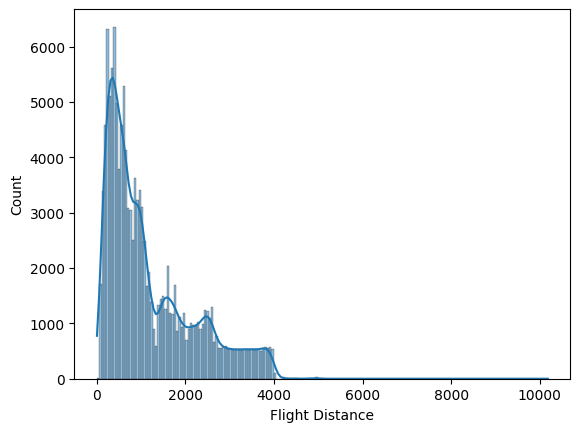

In [15]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

In [16]:
df['Flight Distance'] = np.where(df['Flight Distance'] > 4000, np.NaN, df['Flight Distance'])
df['Flight Distance'] = np.where(df['Flight Distance'] == 0, np.NaN, df['Flight Distance'])

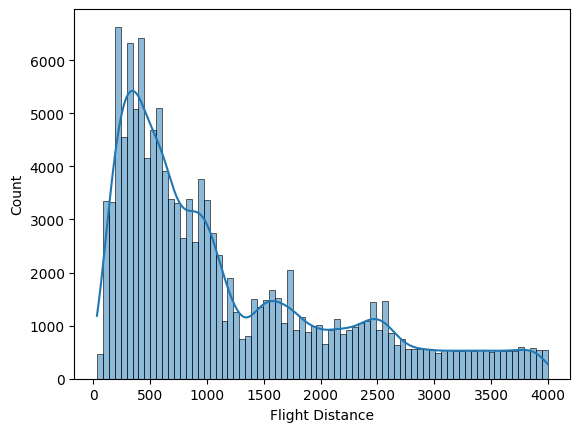

In [17]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

Задержки отправлений и прибытий не являются настолько очевидными значениями, поэтому здесь будем считать выбросом всё, что больше 99 перцентиля.



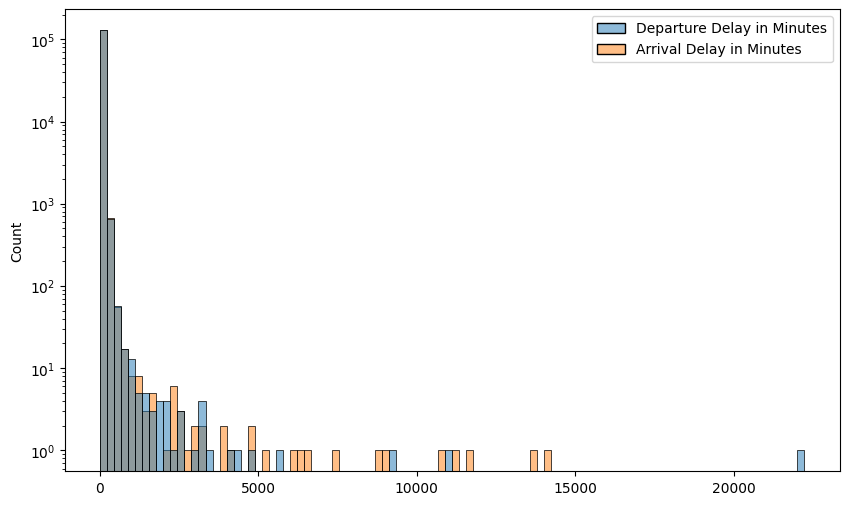

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], bins=100)
plt.yscale('log')
plt.show()

In [19]:
departure_99 = np.nanpercentile(df['Departure Delay in Minutes'], 99)
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > departure_99, np.NaN, df['Departure Delay in Minutes'])

arrival_99 = np.nanpercentile(df['Arrival Delay in Minutes'], 99)
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] > arrival_99, np.NaN, df['Arrival Delay in Minutes'])

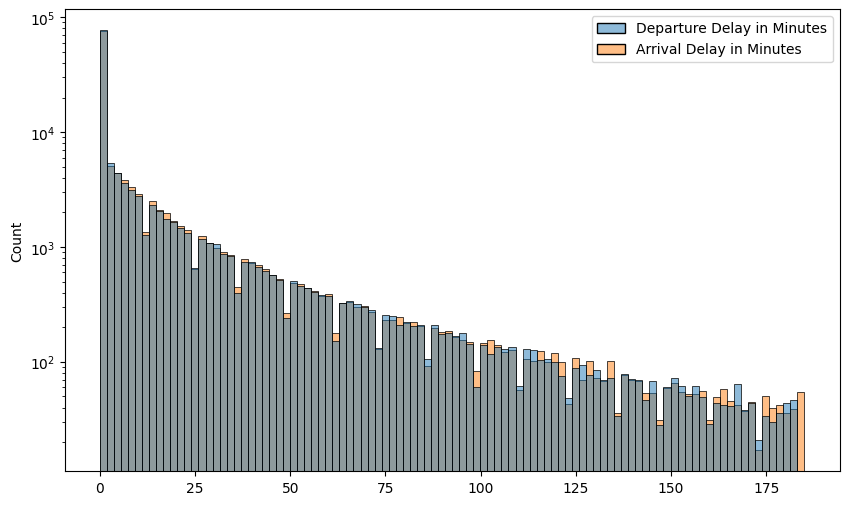

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Departure Delay in Minutes', 'Arrival Delay in Minutes']], bins=100)
plt.yscale('log')
plt.show()

Text(0.5, 1.0, 'Задержка прилета')

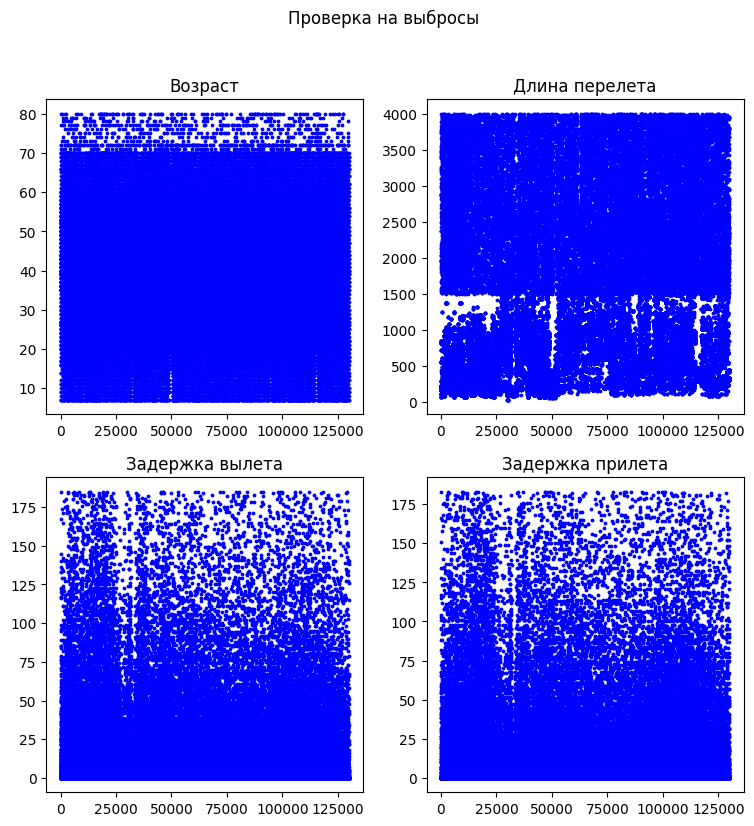

In [21]:
fig, axs = plt.subplots(nrows= 2 , ncols= 2, figsize = [9,9],)

fig. suptitle('Проверка на выбросы')

axs[0,0].scatter(df['id'], df['Age'], s=3, color = 'blue')
axs[0,0].set_title('Возраст')

axs[0,1].scatter(df['id'], df['Flight Distance'], s=3, color = 'blue')
axs[0,1].set_title('Длина перелета')

axs[1,0].scatter(df['id'], df['Arrival Delay in Minutes'], s=3, color = 'blue')
axs[1,0].set_title('Задержка вылета')

axs[1,1].scatter(df['id'], df['Departure Delay in Minutes'], s=3, color = 'blue')
axs[1,1].set_title('Задержка прилета')

Теперь данные выглядят хорошо, с ними можно корректно работать.

##Оценочные признаки

Перейдем к разведке оценочных признаков.

In [22]:
cathegorial = list(df.select_dtypes(include=['float64']))[4:]

Значения выше 5 по пятибалльной шкале являются неадекватными, однако их доля крайне мала, поэтому сделаем их пропусками.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


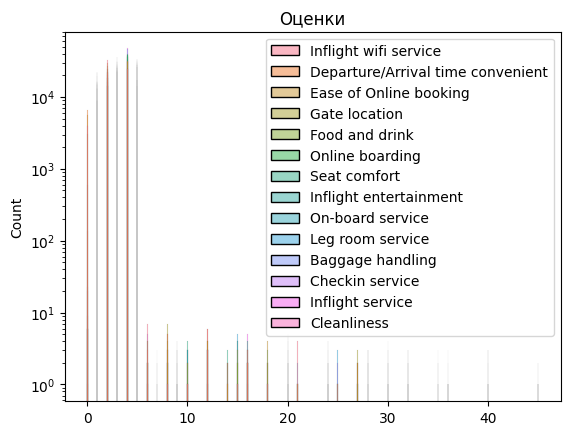

In [23]:
sns.histplot(df[cathegorial]).set(title='Оценки')
plt.yscale('log')
plt.show()

In [24]:
df[cathegorial].max()

Inflight wifi service                45.0
Departure/Arrival time convenient    45.0
Ease of Online booking               45.0
Gate location                        36.0
Food and drink                       45.0
Online boarding                      40.0
Seat comfort                         45.0
Inflight entertainment               45.0
On-board service                     45.0
Leg room service                     40.0
Baggage handling                     40.0
Checkin service                      45.0
Inflight service                     40.0
Cleanliness                          45.0
dtype: float64

In [25]:
pd.DataFrame(df[[cathegorial[0]]].value_counts(), columns=['Встречаемость'])

,Встречаемость
Inflight wifi service,
2.0,32306
3.0,32156
4.0,24758
1.0,22318
5.0,14345
0.0,3918
6.0,7
21.0,4
16.0,3


In [26]:
for col in cathegorial:
    df[col] = np.where(df[col] > 5, np.NaN, df[col])

# проверка:
df[cathegorial].max()

Inflight wifi service                5.0
Departure/Arrival time convenient    5.0
Ease of Online booking               5.0
Gate location                        5.0
Food and drink                       5.0
Online boarding                      5.0
Seat comfort                         5.0
Inflight entertainment               5.0
On-board service                     5.0
Leg room service                     5.0
Baggage handling                     5.0
Checkin service                      5.0
Inflight service                     5.0
Cleanliness                          5.0
dtype: float64

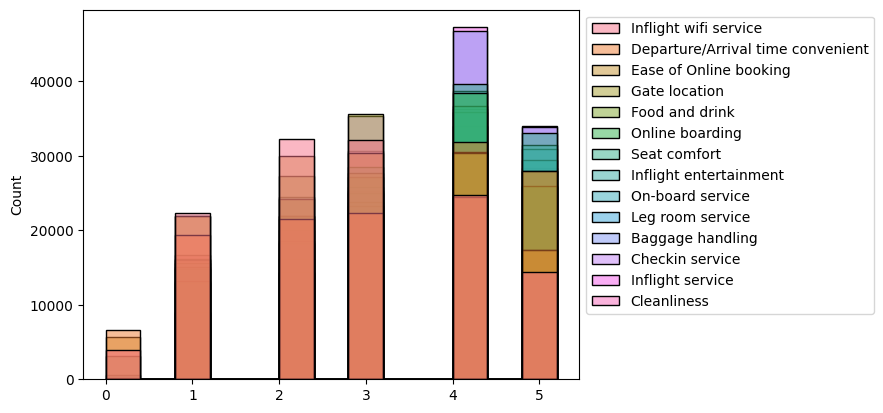

In [27]:
h = sns.histplot(df[cathegorial], binwidth=0.4)
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1))

Теперь оценочные значения адекватны.

##Категориальные признаки

Затем посмотрим на категориальные признаки.

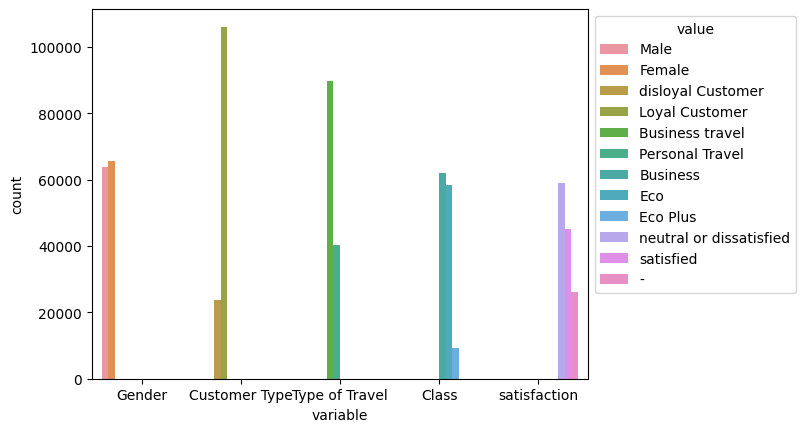

In [28]:
c = sns.countplot(x='variable', hue='value', data=pd.melt(df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']]))
sns.move_legend(c, 'upper left', bbox_to_anchor=(1, 1))
plt.show()


Заметим, что в колонке satisfaction есть непонятная категория "-". Рассмотрим ее подробнее.

<Axes: xlabel='variable', ylabel='count'>

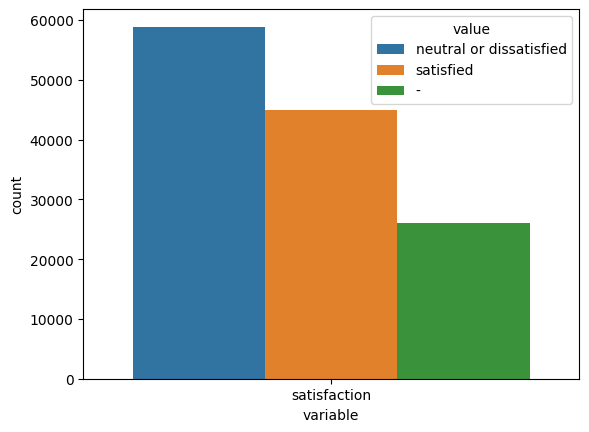

In [29]:
sns.countplot(x='variable', hue='value', data=pd.melt(df[['satisfaction']]))

Доля этой категории весьма существенна, порядка 20%. Посмотрим среднее значение всех оценок каждого клиента в трех категориях удовлетворенности.

In [30]:
unclear = df[df['satisfaction']=='-'].iloc[:,9:23].mean(axis = 1)
satisfied = df[df['satisfaction']=='satisfied'].iloc[:,9:23].mean(axis = 1)
neutral = df[df['satisfaction']=='neutral or dissatisfied'].iloc[:,9:23].mean(axis = 1)

[unclear.mean(),satisfied.mean(),neutral.mean()]

[3.243302707712162, 3.61613570401466, 2.9534632925400435]

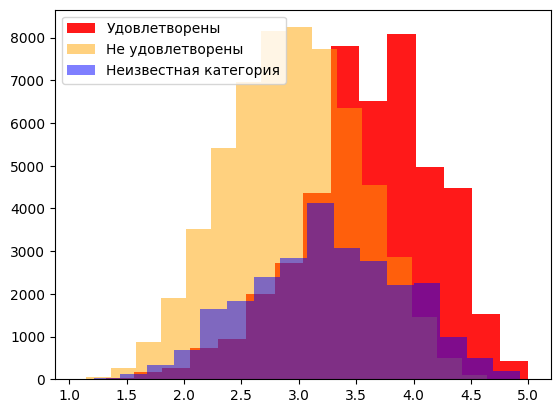

In [31]:
plt.hist(satisfied,alpha=0.9, label='Удовлетворены',color = 'red', bins =16)
plt.hist(neutral,alpha=0.5, label='Не удовлетворены',color = 'orange', bins =16)
plt.hist(unclear, alpha=0.5, label='Неизвестная категория',color = 'blue', bins =16)

plt.legend(loc='upper left')
plt.show()

По числовым значениям и графику видно, что неизвестная группа находится между двумя категориями, исходя из этого её нельзя присоединить к какой-то одной категории, и её придется удалить.

In [32]:
df = df[df['satisfaction'] != '-']

##Пропуски

Далее переходим к работе с пропусками. Узнаем, есть ли повторяющиеся значения и какой процент от данных составляют пропуски.

In [33]:
len (df[df.duplicated()])

0

In [34]:
nulls = pd.DataFrame(df.isna().sum(), columns=['NaN count'])
nulls['NaN %'] = round(df.isna().sum() * 100 / len(df), 2)
nulls

,NaN count,NaN %
id,0,0.00
Gender,260,0.25
Age,678,0.65
Customer Type,66,0.06
Type of Travel,88,0.08
Class,89,0.09
Flight Distance,325,0.31
Departure Delay in Minutes,1148,1.10
Arrival Delay in Minutes,1460,1.41
Inflight wifi service,59,0.06


In [35]:
df['n_nulls'] = df.isnull().sum(axis=1)
df['n_nulls'].value_counts()

0    99863
1     3104
2      916
3       21
Name: n_nulls, dtype: int64

Общая доля строк с пропусками примерно 5/130=3,8%. При этом максимум три пропуска в строке. Заменю значения в числовых колонках на средние, так как доля пропусков крайне мала, десятые и сотые доли процента.

In [36]:
has_nulls = nulls[nulls['NaN count'] > 0].index
for col in has_nulls:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)

 В случае с нечисловыми переменными я принял решение удалить пропущенные значения, так как заполнить их средним/модой было бы странно, а для выделения в отдельную категорию пропусков слишком мало.

In [37]:
object_cols = list(df.select_dtypes(include=['object']))
df.dropna(subset = object_cols, inplace=True)

Пропусков больше нет, данные корректны.

In [38]:
nulls = pd.DataFrame(df.isna().sum(), columns=['NaN count'])
nulls['NaN %'] = round(df.isna().sum() * 100 / len(df), 2)
nulls

,NaN count,NaN %
id,0,0.0
Gender,0,0.0
Age,0,0.0
Customer Type,0,0.0
Type of Travel,0,0.0
Class,0,0.0
Flight Distance,0,0.0
Departure Delay in Minutes,0,0.0
Arrival Delay in Minutes,0,0.0
Inflight wifi service,0,0.0


In [39]:
df = df.drop('n_nulls', axis=1)

In [40]:
df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


##Кодировка и масшатбирование

Закодируем категориальные признаки. У нас есть 4 бинарных признака и в одном признаке три варианта.

In [41]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel' : 1, 'Personal Travel' : 0})
df['satisfaction'] = df['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})

Масшатбируем данные для адекватного обучения модели.

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

categorical = ['Class']
numeric_features = [col for col in df.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

df= column_transformer.fit_transform(df)

lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

df = pd.DataFrame(df, columns=lst)

df.head()

,Class_Eco,Class_Eco Plus,id,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,0.0,0.0,0.000000,1.0,0.561644,0.0,1.0,0.199043,0.010929,0.027027,...,0.6,1.0,1.0,0.6,0.4,1.0,0.8,1.0,1.0,0.0
1,0.0,0.0,0.000008,0.0,0.383562,1.0,1.0,0.199043,0.142077,0.210811,...,1.0,0.8,1.0,1.0,1.0,1.0,0.6,1.0,1.0,1.0
2,0.0,0.0,0.000015,1.0,0.465753,1.0,1.0,0.207105,0.000000,0.000000,...,1.0,1.0,0.6,0.6,0.6,0.6,0.8,0.6,1.0,1.0
3,0.0,0.0,0.000023,1.0,0.589041,1.0,1.0,0.472159,0.000000,0.000000,...,0.8,1.0,1.0,1.0,1.0,1.0,0.6,1.0,0.8,1.0
4,0.0,0.0,0.000031,0.0,0.575342,1.0,1.0,0.866465,0.000000,0.005405,...,1.0,0.8,0.6,0.6,0.8,0.6,0.6,0.6,1.0,1.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103401 entries, 0 to 103400
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Class_Eco                          103401 non-null  float64
 1   Class_Eco Plus                     103401 non-null  float64
 2   id                                 103401 non-null  float64
 3   Gender                             103401 non-null  float64
 4   Age                                103401 non-null  float64
 5   Customer Type                      103401 non-null  float64
 6   Type of Travel                     103401 non-null  float64
 7   Flight Distance                    103401 non-null  float64
 8   Departure Delay in Minutes         103401 non-null  float64
 9   Arrival Delay in Minutes           103401 non-null  float64
 10  Inflight wifi service              103401 non-null  float64
 11  Departure/Arrival time convenient  1034

##Корреляция

Посмотрим на корреляцию признаков.

<Axes: >

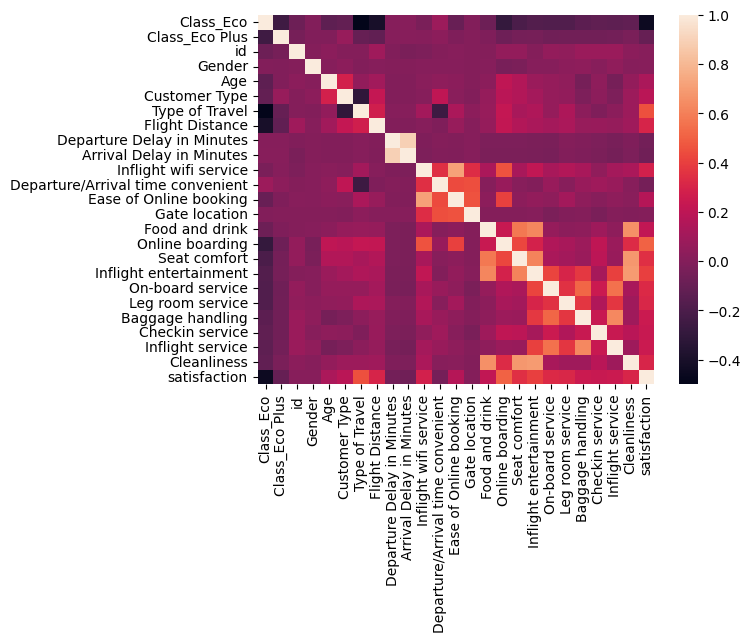

In [55]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)

Можно отметить, что оценочные признаки коррелируют между собой, карта более светлых оттенков в местах их пересечения. Тем не менее, в основном признаки датасета не имеют сильной корреляции, из чего следует вывод, что они не будут мешать строить модель.

#Обучение и интерпретация модели

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

Наша целевая переменная - собственно удовлетворенность полетом (satisfaction). Выбросим также колонку id как ненужную. Далее разделим данные на тренировочную и тестовую выборки и проведем обучение модели.

In [46]:
X = df.drop(['id', 'satisfaction'], axis=1)

y = df['satisfaction'] # целевая переменная (target)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((72380, 23), (31021, 23))

In [48]:
model = LogisticRegression(max_iter=500, random_state=42)

model.fit(X_train, y_train)

preds = model.predict(X_test)

##Оценка качества модели

Используем следующие метрики:


*   Accuracy - это доля правильных ответов модели, самая понятная метрика.
*   Precision - точность - она показывает долю правильных ответов модели среди тех объектов, которые модель отнесла к положительному классу.
*   Recall - полнота - доля найденных объектов положительного класса среди всех объектов положительного класса.



In [49]:
print(f'Accuracy: {round(accuracy_score(y_test, preds), 3)}')
print(f'Precision: {round(precision_score(y_test, preds), 3)}')
print(f'Recall: {round(recall_score(y_test, preds), 3)}')

Accuracy: 0.875
Precision: 0.868
Recall: 0.836


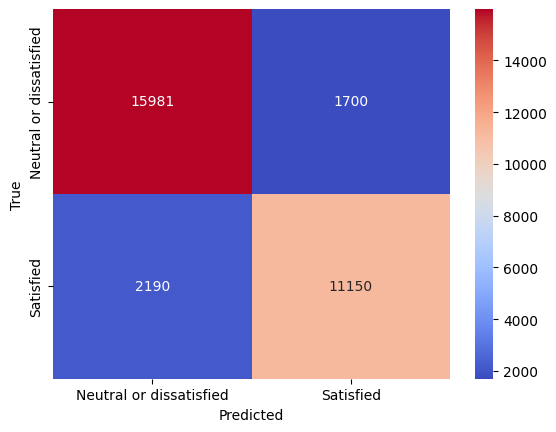

In [50]:
ax = sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='coolwarm')

ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

ax.set_ylabel('True')
ax.yaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

plt.show()

В задаче четко не указано, какая у нас ситуация и какую именно метрика является целевой. В базовом варианте значения точности и полноты практически одинаковы, поэтому можно применять её.

Заметим, что нейтральные и недовольные клиенты объединены в общую категорию, а довольные выделены отдельно. Исходя из этого можно предположить две бизнес-задачи:

* авиакомпании хочется, чтобы каждый их клиент испытывал именно положительные эмоции от полета. В таком случае нужно найти всех, кто нейтрален или неудовлетворен и пытаться улучшить их мнение - а для этого нам нужна полнота (recall). В таком случае классы нужно перекодировать, взяв за единицу нейтральных и неудовлетворенных, ведь именно их мы и хотим выделить максимально полно.

* авиакомпания хочет найти какие параметры полета в целом наиболее сильно снижают удовлетворенность полетом, для дальнейшего улучшения качества обслуживания. В таком случае важны веса модели, которые отражают влияние признаков на впечатление клиентов, и влияния точности или полноты нет, так как важна общая хорошая объяснительная способность модели.


Способы повысить точность и полноту приведены ниже:

In [57]:
probs = model.predict_proba(X_test)

Accuracy: 0.868
Precision: 0.938
Recall: 0.741


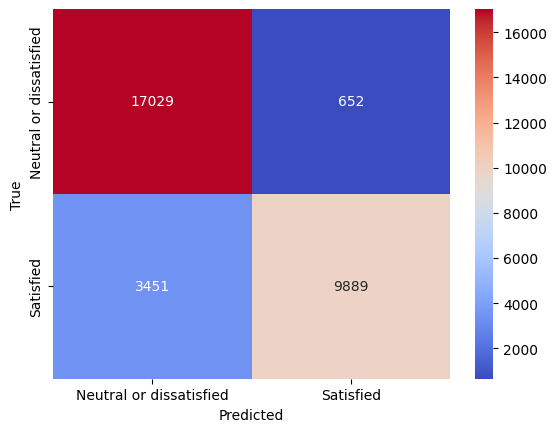

In [58]:
# повышаем точность
precision_preds = probs[:,1] > 0.7

print(f'Accuracy: {round(accuracy_score(y_test, precision_preds), 3)}')
print(f'Precision: {round(precision_score(y_test, precision_preds), 3)}')
print(f'Recall: {round(recall_score(y_test, precision_preds), 3)}')

ax = sns.heatmap(confusion_matrix(y_test, precision_preds), annot=True, fmt='d', cmap='coolwarm')

ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

ax.set_ylabel('True')
ax.yaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

plt.show()


Accuracy: 0.84
Precision: 0.77
Recall: 0.895


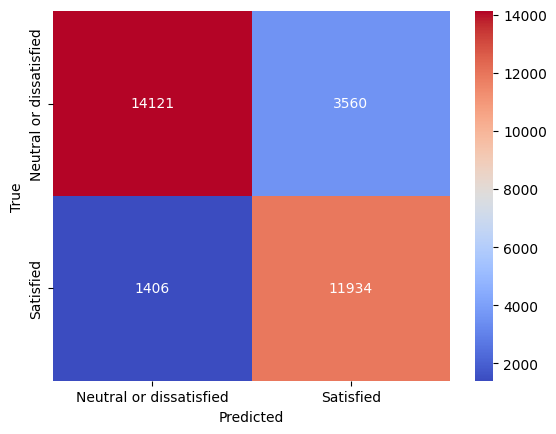

In [59]:
# повышаем полноту
recall_preds = probs[:,1] > 0.3

print(f'\nAccuracy: {round(accuracy_score(y_test, recall_preds), 3)}')
print(f'Precision: {round(precision_score(y_test, recall_preds), 3)}')
print(f'Recall: {round(recall_score(y_test, recall_preds), 3)}')

ax = sns.heatmap(confusion_matrix(y_test, recall_preds), annot=True, fmt='d', cmap='coolwarm')

ax.set_xlabel('Predicted')
ax.xaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

ax.set_ylabel('True')
ax.yaxis.set_ticklabels(['Neutral or dissatisfied', 'Satisfied'])

plt.show()

##Вывод весов модели

Выведем таблицу вес-признак, чтобы узнать, что наиболее сильно влияет на мнение пассажиров. Знак нам не важен, так как мы учитываем и положительные и отрицательные стороны.

In [61]:
importances = pd.DataFrame({'Вес': model.coef_[0], 'Признак': X_train.columns})
importances.sort_values(by='Вес', key=abs, ascending=False, inplace=True)
importances

,Вес,Признак
14,3.036229,Online boarding
5,2.712309,Type of Travel
4,2.044122,Customer Type
9,1.941260,Inflight wifi service
20,1.582885,Checkin service
8,-1.572451,Arrival Delay in Minutes
17,1.490662,On-board service
18,1.233716,Leg room service
22,1.096046,Cleanliness
1,-0.848132,Class_Eco Plus


Итого топ-10 самых важнейших пунктов, влияющих на радость полета:

1. оценка онлайн посадки
2. полёт по работе
3. лояльность пассажира
4. оценка вайфая на борту
5. задержка прибытия
6. оценка регистрации
7. оценка обслуживания на борту
8. оценка места для ног
9. оценка чистоты на борту
10. класс пассажирского места

Шесть из десяти самых важных признаков - оценки из постполётоного опросника. Ожидаемо, что они позитивно связаны с удовлетворённостью. Лояльные клиенты и клиенты, летевшие по работе (а не по личным делам), будут тоже более довольны перелётом. А вот задержка вылета плохо сказывается на общем впечатлении. Также негативно влияет и полет пассажиров эконом и эконом+ класса (очевидно, бизнес класс комфортнее).

Наименьшее влияние на удовлетворённость полётом влияет пол пассажира, оценки питания и расположения гейта, а также расстояние полёта.

##Сохранение модели

Сохраним модель для возможности дальнейшего использования.

In [53]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

with open('model.pickle', 'rb') as f:
    model = pickle.load(f)
